> COLETA, CARREGAMENTO e ANALISE EXPLORATÓRIA DOS DADOS (EDA)

In [39]:
import os

# Listar arquivos no diretório atual
print(os.listdir('C:/Users/Administrator/Documents/Programação/Projetos/childhood-obesity-project'))


['.ipynb_checkpoints', 'child_ob.ipynb', 'child_ob_gender.csv', 'env', 'obesity_child_age.csv', 'Passo a Passo do Projeto de Obesidade Infantil.docx', 'project.ipynb', '~$sso a Passo do Projeto de Obesidade Infantil.docx', '~WRL1091.tmp']


In [40]:
import pandas as pd

# Carregar os datasets
df_gender = pd.read_csv('C:/Users/Administrator/Documents/Programação/Projetos/childhood-obesity-project/child_ob_gender.csv')
df_age = pd.read_csv('C:/Users/Administrator/Documents/Programação/Projetos/childhood-obesity-project/obesity_child_age.csv')

In [41]:
# Visualizar as primeiras linhas do dataset
print (df_gender.head())
print (df_age.head())

   index         Time Gender  PercentOW  PercentOB
0      0  [1971,1974]      F       10.1        5.1
1      1  [1976,1980]      F        9.0        5.6
2      2  [1988,1994]      F       13.4        9.8
3      3  [1999,2000]      F       13.4       13.8
4      4  [2001,2002]      F       15.0       14.3
   index         Time    Age Gender  PercentObese   SE
0      0  [1971,1974]  [2,5]    All           5.0 -0.6
1      1  [1976,1980]  [2,5]    All           5.0 -0.6
2      2  [1988,1994]  [2,5]    All           7.2 -0.7
3      3  [1999,2000]  [2,5]    All          10.3 -1.7
4      4  [2001,2002]  [2,5]    All          10.6 -1.8


In [42]:
# Informações dos dados
print(df_gender.info())
print(df_age.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      33 non-null     int64  
 1   Time       33 non-null     object 
 2   Gender     33 non-null     object 
 3   PercentOW  33 non-null     float64
 4   PercentOB  33 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         99 non-null     int64  
 1   Time          99 non-null     object 
 2   Age           99 non-null     object 
 3   Gender        99 non-null     object 
 4   PercentObese  99 non-null     float64
 5   SE            99 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.8+ KB
None


In [43]:
# Estatísticas descritivas
print(df_gender.describe())
print(df_age.describe())


          index  PercentOW  PercentOB
count  33.00000  33.000000  33.000000
mean   16.00000  13.924242  13.654545
std     9.66954   2.244581   4.508609
min     0.00000   9.000000   5.100000
25%     8.00000  13.400000  10.200000
50%    16.00000  14.600000  15.400000
75%    24.00000  15.400000  16.900000
max    32.00000  16.600000  18.600000
           index  PercentObese         SE
count  99.000000     99.000000  99.000000
mean   49.000000     12.966667  -1.510101
std    28.722813      5.188665   0.601104
min     0.000000      3.600000  -3.200000
25%    24.500000      9.350000  -2.000000
50%    49.000000     14.100000  -1.600000
75%    73.500000     17.550000  -1.000000
max    98.000000     21.400000  -0.500000


In [44]:
# Identificar valores ausentes
print(df_gender.isnull().sum())
print(df_age.isnull().sum())


index        0
Time         0
Gender       0
PercentOW    0
PercentOB    0
dtype: int64
index           0
Time            0
Age             0
Gender          0
PercentObese    0
SE              0
dtype: int64


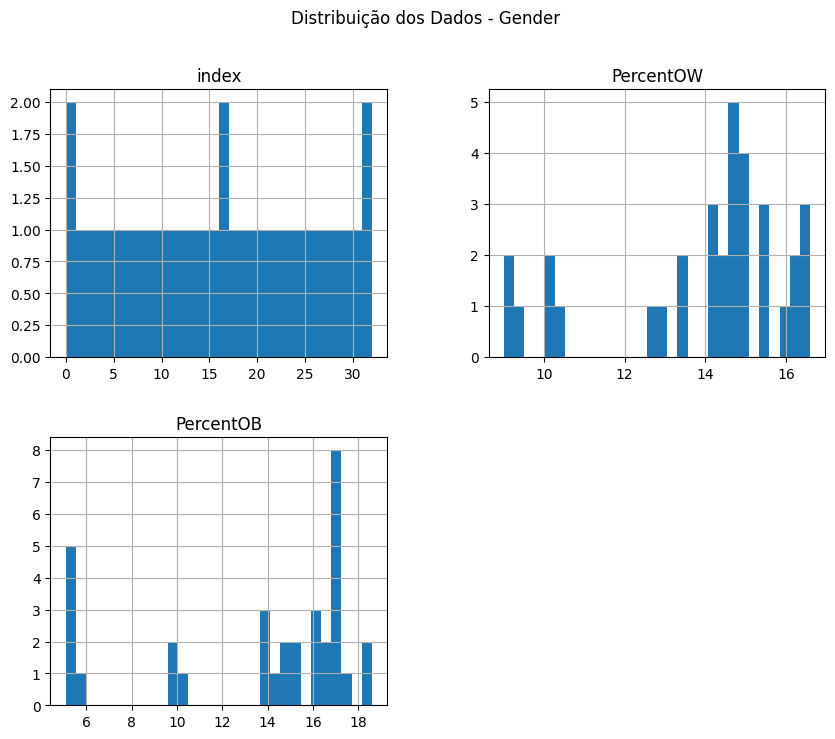

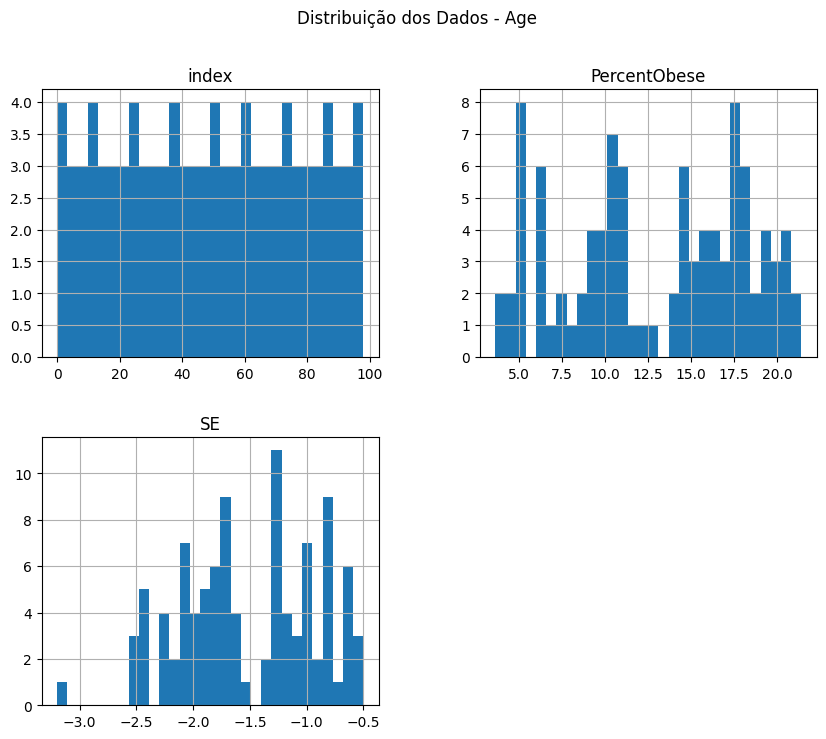

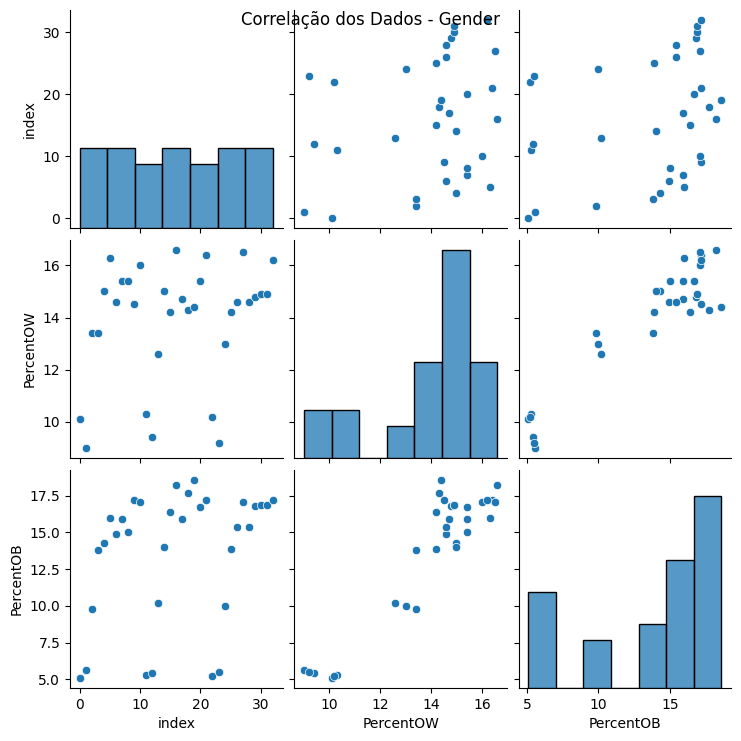

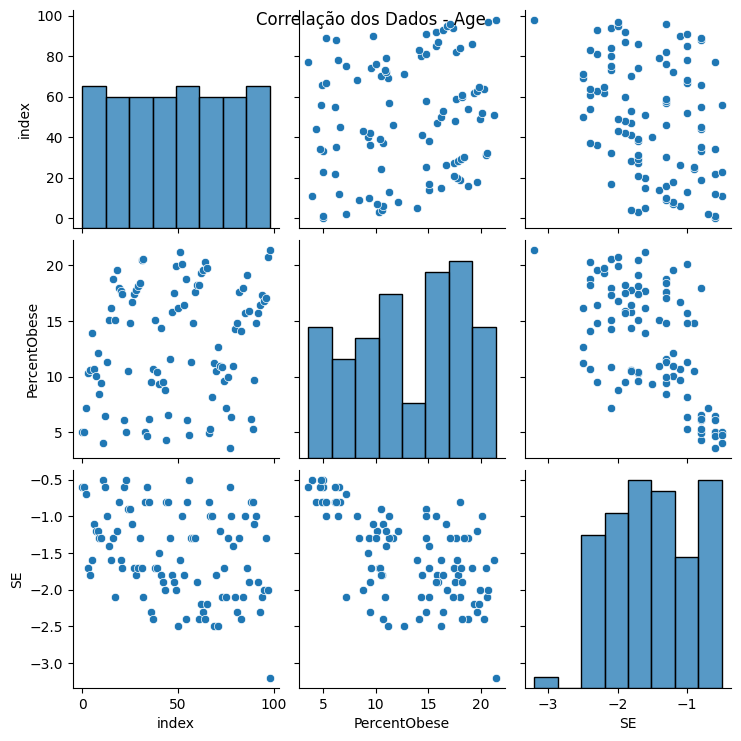

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramas
df_gender.hist(bins=30, figsize=(10, 8))
plt.suptitle('Distribuição dos Dados - Gender')
plt.show()

df_age.hist(bins=30, figsize=(10, 8))
plt.suptitle('Distribuição dos Dados - Age')
plt.show()

# Gráficos de dispersão
sns.pairplot(df_gender)
plt.suptitle('Correlação dos Dados - Gender')
plt.show()

sns.pairplot(df_age)
plt.suptitle('Correlação dos Dados - Age')
plt.show()


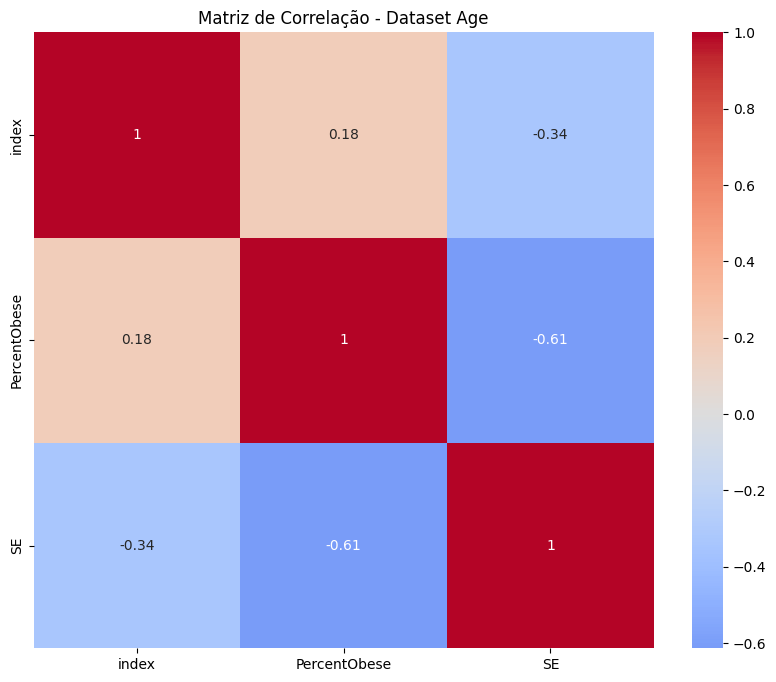

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas colunas numéricas
numeric_df_age = df_age.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação
correlation_matrix_age = numeric_df_age.corr()

# Visualizar a matriz de correlação usando um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_age, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação - Dataset Age')
plt.show()


Coeficiente de Correlação de Pearson: 0.9330169125133005
Valor p: 2.6305300561589737e-15


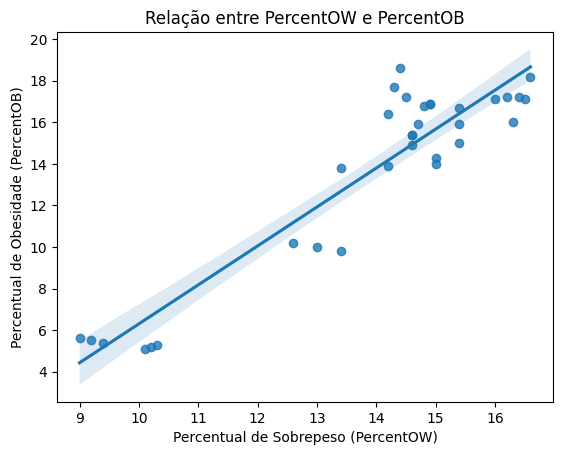

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Carregar o dataset
df_gender = pd.read_csv('C:/Users/Administrator/Documents/Programação/Projetos/childhood-obesity-project/child_ob_gender.csv')

# Calcular a correlação de Pearson entre PercentOW e PercentOB
correlation, p_value = pearsonr(df_gender['PercentOW'], df_gender['PercentOB'])

# Exibir a correlação e o valor p
print(f'Coeficiente de Correlação de Pearson: {correlation}')
print(f'Valor p: {p_value}')

# Plotar gráfico de dispersão com linha de tendência
sns.regplot(x='PercentOW', y='PercentOB', data=df_gender)
plt.title('Relação entre PercentOW e PercentOB')
plt.xlabel('Percentual de Sobrepeso (PercentOW)')
plt.ylabel('Percentual de Obesidade (PercentOB)')
plt.show()


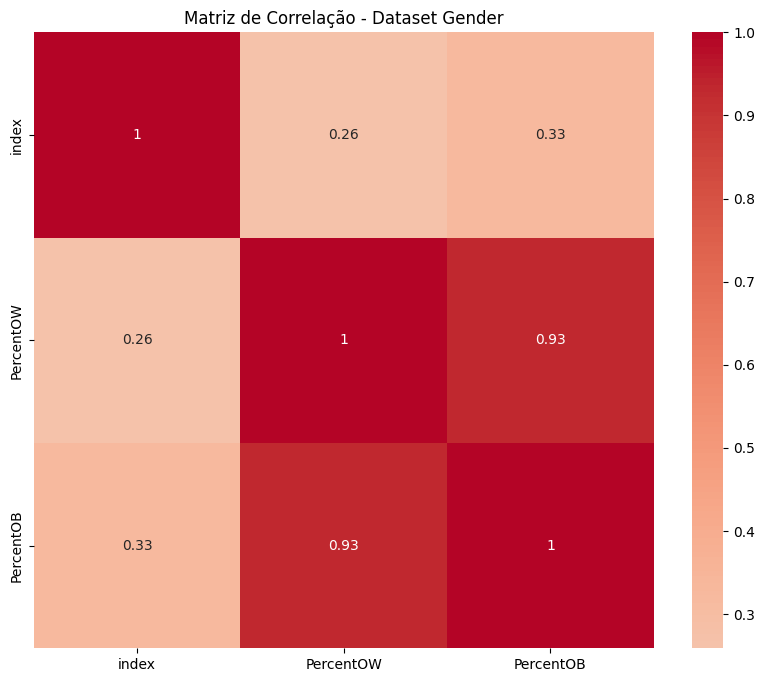

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset
df_gender = pd.read_csv('C:/Users/Administrator/Documents/Programação/Projetos/childhood-obesity-project/child_ob_gender.csv')

# Selecionar apenas colunas numéricas
numeric_df_gender = df_gender.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação
correlation_matrix_gender = numeric_df_gender.corr()

# Visualizar a matriz de correlação usando um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_gender, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação - Dataset Gender')
plt.show()


> TRANSFORMAÇÃO DOS DADOS

In [49]:
from sklearn.preprocessing import StandardScaler

# Selecionar colunas numéricas para padronização
numeric_columns = df_gender.select_dtypes(include=['float64', 'int64']).columns

# Inicializar o scaler
scaler = StandardScaler()

# Padronizar os dados
df_gender[numeric_columns] = scaler.fit_transform(df_gender[numeric_columns])

# Visualizar os dados padronizados
print(df_gender.head())


      index         Time Gender  PercentOW  PercentOB
0 -1.680336  [1971,1974]      F  -1.730183  -1.926799
1 -1.575315  [1976,1980]      F  -2.227851  -1.814180
2 -1.470294  [1988,1994]      F  -0.237180  -0.868186
3 -1.365273  [1999,2000]      F  -0.237180   0.032762
4 -1.260252  [2001,2002]      F   0.486700   0.145380


In [ ]:
# Criando a nova feature OW_to_OB_Ratio

In [50]:
# Criar nova feature 'OW_to_OB_Ratio'
df_gender['OW_to_OB_Ratio'] = df_gender['PercentOW'] / df_gender['PercentOB']

# Visualizar as primeiras linhas para verificar a nova feature
print(df_gender.head())


      index         Time Gender  PercentOW  PercentOB  OW_to_OB_Ratio
0 -1.680336  [1971,1974]      F  -1.730183  -1.926799        0.897958
1 -1.575315  [1976,1980]      F  -2.227851  -1.814180        1.228021
2 -1.470294  [1988,1994]      F  -0.237180  -0.868186        0.273191
3 -1.365273  [1999,2000]      F  -0.237180   0.032762       -7.239560
4 -1.260252  [2001,2002]      F   0.486700   0.145380        3.347773


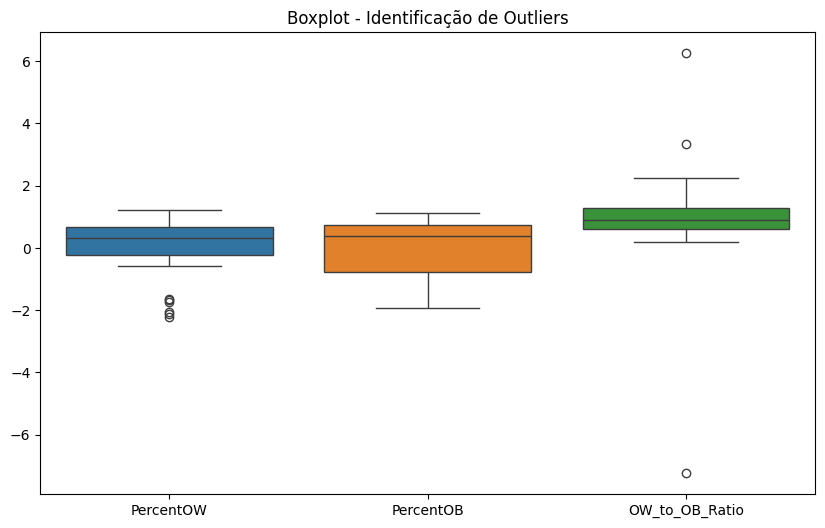

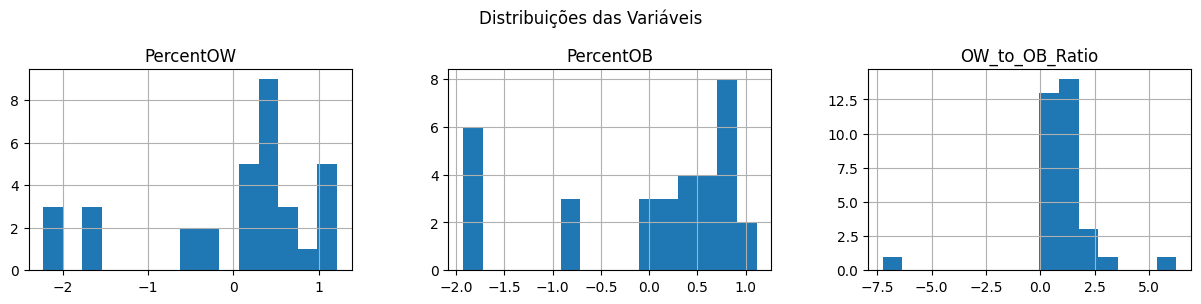

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot para identificar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_gender[['PercentOW', 'PercentOB', 'OW_to_OB_Ratio']])
plt.title('Boxplot - Identificação de Outliers')
plt.show()

# Histogramas para analisar distribuições
df_gender[['PercentOW', 'PercentOB', 'OW_to_OB_Ratio']].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.suptitle('Distribuições das Variáveis')
plt.show()


In [72]:
# Exemplo: Verificar se há valores negativos em colunas que deveriam ser sempre positivas
print(df_gender[(df_gender['PercentOW'] < 0) | (df_gender['PercentOB'] < 0)])
# Tratar valores inválidos e negativos
df_gender['PercentOW'] = df_gender['PercentOW'].apply(lambda x: max(x, 0))
df_gender['PercentOB'] = df_gender['PercentOB'].apply(lambda x: max(x, 0))


       index         Time Gender  PercentOW  PercentOB  OW_to_OB_Ratio
0  -1.680336  [1971,1974]      F  -1.006555  -1.152018   -1.306013e-17
1  -1.575315  [1976,1980]      F  -1.006555  -1.152018   -1.306013e-17
2  -1.470294  [1988,1994]      F  -1.006555  -1.152018   -1.306013e-17
3  -1.365273  [1999,2000]      F  -1.006555  -1.061056   -1.173178e+00
4  -1.260252  [2001,2002]      F   0.240990  -0.748373    1.868387e+00
6  -1.050210  [2005,2006]      F  -0.222886  -0.373153   -1.830046e-01
8  -0.840168  [2009,2010]      F   0.704866  -0.310616    8.285002e-01
9  -0.735147  [2011,2012]      F  -0.338855   1.065191   -8.768207e-01
11 -0.525105  [1971,1974]      M  -1.006555  -1.152018   -1.306013e-17
12 -0.420084  [1976,1980]      M  -1.006555  -1.152018   -1.306013e-17
13 -0.315063  [1988,1994]      M  -1.006555  -1.152018   -1.306013e-17
14 -0.210042  [1999,2000]      M   0.240990  -0.935983    4.509746e+00
15 -0.105021  [2001,2002]      M  -0.686762   0.564897   -9.898787e-01
17  0.

In [73]:
# Verificar os quantis para definir os limites corretamente
for col in columns_to_winsorize:
    Q1 = df_gender[col].quantile(0.01)
    Q99 = df_gender[col].quantile(0.99)
    print(f"{col}: 1% quantile = {Q1}, 99% quantile = {Q99}")


PercentOW: 1% quantile = 0.0, 99% quantile = 2.0593830911349262
PercentOB: 1% quantile = 0.0, 99% quantile = 1.8606570862649021
OW_to_OB_Ratio: 1% quantile = -1.1189359615261774, 99% quantile = 3.664510836299132


In [74]:
# Criar a nova feature 'OW_to_OB_Ratio'
df_gender['OW_to_OB_Ratio'] = df_gender['PercentOW'] / df_gender['PercentOB']


Análise de Outliers e Distribuições

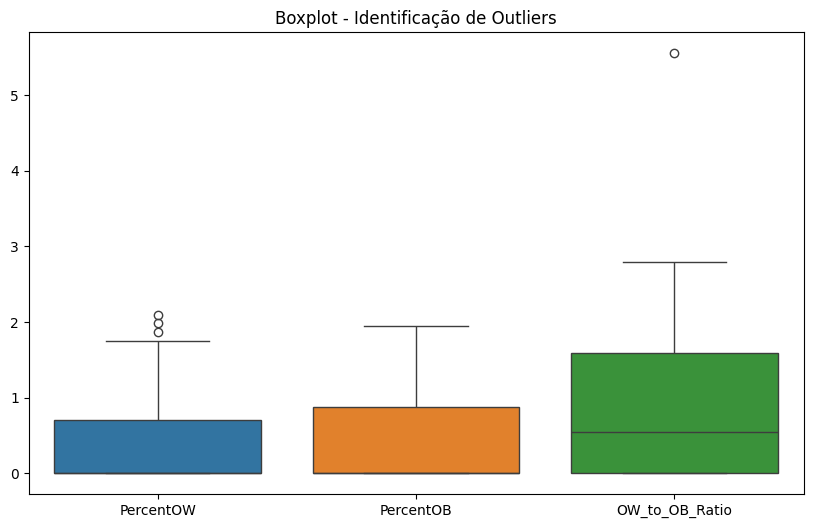

In [75]:
# Boxplot para identificar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_gender[['PercentOW', 'PercentOB', 'OW_to_OB_Ratio']])
plt.title('Boxplot - Identificação de Outliers')
plt.show()


Análise após Transformação:

index             0
Time              0
Gender            0
PercentOW         0
PercentOB         0
OW_to_OB_Ratio    0
dtype: int64


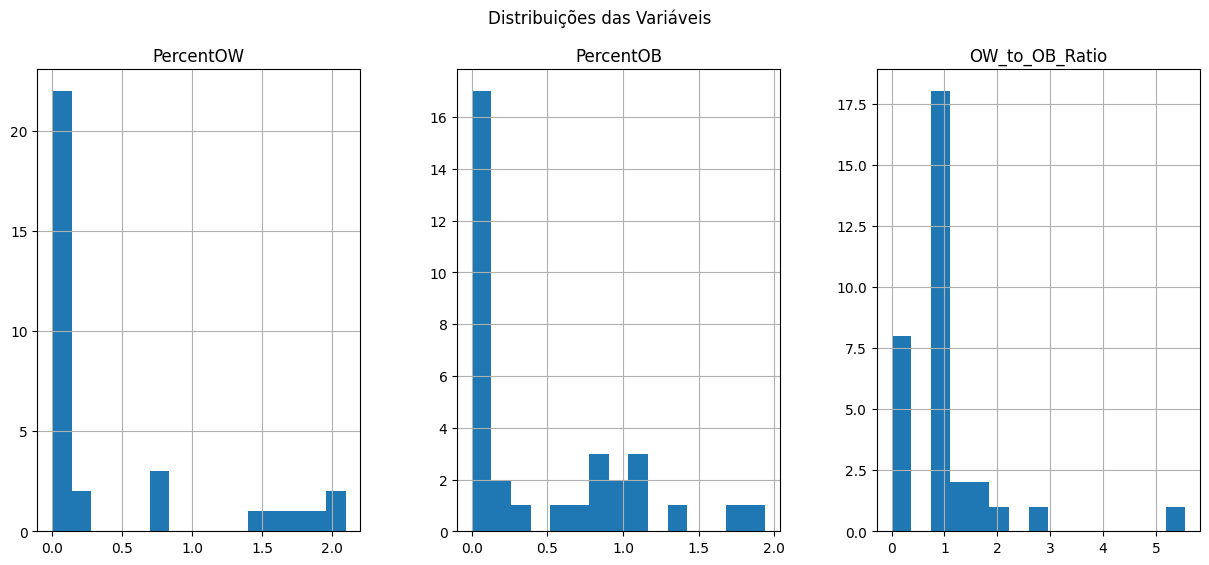

In [78]:
import numpy as np

# Substituir valores infinitos por NaN
df_gender.replace([np.inf, -np.inf], np.nan, inplace=True)

# Preencher valores NaN com a média da coluna
numeric_cols = df_gender.select_dtypes(include=[np.number]).columns
df_gender[numeric_cols] = df_gender[numeric_cols].fillna(df_gender[numeric_cols].mean())

# Verificar novamente se há valores ausentes (opcional)
print(df_gender.isnull().sum())

# Histogramas para analisar distribuições
df_gender[['PercentOW', 'PercentOB', 'OW_to_OB_Ratio']].hist(bins=15, figsize=(15, 6), layout=(1, 3))
plt.suptitle('Distribuições das Variáveis')
plt.show()


In [85]:
# correção devido etapa posterior estar apresentando OW_to_OB_Ratio igual a zero:

import pandas as pd

# Recarregar os dados originais
df_gender = pd.read_csv('C:/Users/Administrator/Documents/Programação/Projetos/childhood-obesity-project/child_ob_gender.csv')

# Verificar os valores originais
print(df_gender[['PercentOW', 'PercentOB']].head())

# Criar a feature 'OW_to_OB_Ratio' antes da padronização
df_gender['OW_to_OB_Ratio'] = df_gender['PercentOW'] / df_gender['PercentOB']

# Verificar os valores da nova feature
print(df_gender[['PercentOW', 'PercentOB', 'OW_to_OB_Ratio']].head())

# Padronização (se necessário)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_gender[['PercentOW', 'PercentOB', 'OW_to_OB_Ratio']] = scaler.fit_transform(df_gender[['PercentOW', 'PercentOB', 'OW_to_OB_Ratio']])

# Verificar os dados padronizados
print(df_gender.head())


   PercentOW  PercentOB
0       10.1        5.1
1        9.0        5.6
2       13.4        9.8
3       13.4       13.8
4       15.0       14.3
   PercentOW  PercentOB  OW_to_OB_Ratio
0       10.1        5.1        1.980392
1        9.0        5.6        1.607143
2       13.4        9.8        1.367347
3       13.4       13.8        0.971014
4       15.0       14.3        1.048951
   index         Time Gender  PercentOW  PercentOB  OW_to_OB_Ratio
0      0  [1971,1974]      F  -1.730183  -1.926799        2.416036
1      1  [1976,1980]      F  -2.227851  -1.814180        1.355171
2      2  [1988,1994]      F  -0.237180  -0.868186        0.673612
3      3  [1999,2000]      F  -0.237180   0.032762       -0.452862
4      4  [2001,2002]      F   0.486700   0.145380       -0.231347


In [86]:
# Já feito: Limpeza de valores negativos e criação da feature 'OW_to_OB_Ratio'

# Padronização (se necessário)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_gender[['PercentOW', 'PercentOB', 'OW_to_OB_Ratio']] = scaler.fit_transform(df_gender[['PercentOW', 'PercentOB', 'OW_to_OB_Ratio']])

# Verificar os dados padronizados
print(df_gender.head())


   index         Time Gender  PercentOW  PercentOB  OW_to_OB_Ratio
0      0  [1971,1974]      F  -1.730183  -1.926799        2.416036
1      1  [1976,1980]      F  -2.227851  -1.814180        1.355171
2      2  [1988,1994]      F  -0.237180  -0.868186        0.673612
3      3  [1999,2000]      F  -0.237180   0.032762       -0.452862
4      4  [2001,2002]      F   0.486700   0.145380       -0.231347


Tratando os dados ausentes:

In [87]:
# Verificar se há valores ausentes
print(df_gender.isnull().sum())

# Preencher valores ausentes apenas nas colunas numéricas
numeric_cols = df_gender.select_dtypes(include=[np.number]).columns
df_gender[numeric_cols] = df_gender[numeric_cols].fillna(df_gender[numeric_cols].mean())

# Verificar novamente se há valores ausentes
print(df_gender.isnull().sum())


index             0
Time              0
Gender            0
PercentOW         0
PercentOB         0
OW_to_OB_Ratio    0
dtype: int64
index             0
Time              0
Gender            0
PercentOW         0
PercentOB         0
OW_to_OB_Ratio    0
dtype: int64


In [88]:
# Já feito: Limpeza de valores negativos e criação da feature 'OW_to_OB_Ratio'

# Padronização (se necessário)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_gender[['PercentOW', 'PercentOB', 'OW_to_OB_Ratio']] = scaler.fit_transform(df_gender[['PercentOW', 'PercentOB', 'OW_to_OB_Ratio']])

# Verificar os dados padronizados
print(df_gender.head())

   index         Time Gender  PercentOW  PercentOB  OW_to_OB_Ratio
0      0  [1971,1974]      F  -1.730183  -1.926799        2.416036
1      1  [1976,1980]      F  -2.227851  -1.814180        1.355171
2      2  [1988,1994]      F  -0.237180  -0.868186        0.673612
3      3  [1999,2000]      F  -0.237180   0.032762       -0.452862
4      4  [2001,2002]      F   0.486700   0.145380       -0.231347


> ANÁLISE E MODELAGEM DE DADOS

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecionar as features e o target
X = df_gender[['PercentOW', 'PercentOB', 'OW_to_OB_Ratio']]
y = df_gender['PercentOB']

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar um modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R^2: {r2}")


MSE: 1.1093356479670479e-31
R^2: 1.0


In [90]:
from sklearn.model_selection import cross_val_score

# Realizar a validação cruzada com 5 folds
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validated MSE: {np.mean(-cv_scores)}')


Cross-Validated MSE: 3.041114458173488e-31


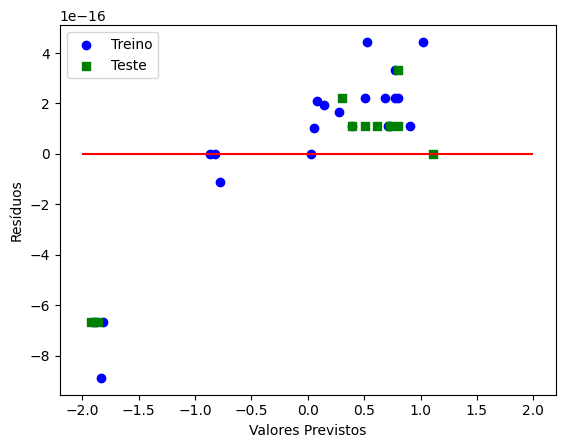

In [91]:
import matplotlib.pyplot as plt

# Fazer previsões no conjunto de treino
y_train_pred = model.predict(X_train)

# Plotar os resíduos
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Treino')
plt.scatter(y_pred, y_pred - y_test, c='green', marker='s', label='Teste')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-2, xmax=2, color='red')
plt.show()


In [70]:
# Salvo o dataframe final transformado em um arquivo CSV para futuras análises.
df.to_csv('dados_transformados.csv', index=False)